In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import bean.model.readwrite
from adjustText import adjust_text

In [2]:
plt.style.use('default')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False

In [3]:
scores_tbl = pd.read_csv("../../results/model_runs/bean_negctrl/bean_run_result.bean_count_LDLvar_annotated/bean_element_result.MixtureNormal+Acc.csv")

In [4]:
from scipy.stats import norm

def get_quantile(mu, sd, q):
    dist = norm(mu, sd)
    return dist.ppf(q)
    
def add_credible_interval(df, mu_col, mu_sd_col, alpha=0.05):
    """Add credible interval to df"""
    df = df.copy()
    df[f"CI[{alpha/2}"] = get_quantile(df[mu_col], df[mu_sd_col], alpha/2)
    df[f"{1-alpha/2}]"] = get_quantile(df[mu_col], df[mu_sd_col], 1-alpha/2)
    return df

In [5]:
scores_tbl = add_credible_interval(scores_tbl.sort_values('mu_z_adj'), "mu_adj", "mu_sd_adj")

In [37]:
scores_tbl = scores_tbl.drop("Unnamed: 0", axis=1)

In [39]:
scores_tbl.to_csv("TableS4_LDLC_GWAS_BEAN_output.csv")

In [6]:
hits = scores_tbl.loc[scores_tbl["CI[0.025"]*scores_tbl["0.975]"] > 0]

In [7]:
hits

,Unnamed: 0,target,target_variant,target_group,target_group2,edit_rate_mean,edit_rate_std,mu,mu_sd,mu_z,...,mu_sd_scaled,mu_z_scaled,sd_scaled,novl_scaled,mu_adj,mu_sd_adj,mu_z_adj,novl_adj,CI[0.025,0.975]
74,74,LDLR_SD_12,LDLR,PosCtrl,PosCtrl_dec,0.605040,0.145153,-1.519292,0.094432,-16.088717,...,0.095198,-16.069727,1.007934,0.929258,-1.529812,0.094767,-16.142845,0.929543,-1.715552,-1.344071
65,65,LDLR_SA_4,LDLR,PosCtrl,PosCtrl_dec,0.503645,0.118360,-1.343790,0.090258,-14.888320,...,0.090990,-14.868451,1.003721,0.915109,-1.352886,0.090578,-14.936104,0.915447,-1.530416,-1.175356
71,71,LDLR_SD_9,LDLR,PosCtrl,PosCtrl_dec,0.631704,0.168399,-1.317933,0.094030,-14.016108,...,0.094793,-13.997035,1.007225,0.909289,-1.326819,0.094364,-14.060723,0.909649,-1.511768,-1.141870
69,69,LDLR_SA_8,LDLR,PosCtrl,PosCtrl_dec,0.677679,0.095749,-1.110089,0.082550,-13.447397,...,0.083220,-13.425674,1.002792,0.898877,-1.117289,0.082843,-13.486762,0.899276,-1.279659,-0.954919
75,75,LDLR_SD_13,LDLR,PosCtrl,PosCtrl_dec,0.398683,0.055129,-1.035116,0.089634,-11.548209,...,0.090362,-11.528202,1.009398,0.883445,-1.041707,0.089952,-11.580656,0.883901,-1.218010,-0.865404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,226,rs1250259_Maj_ABE_59,rs1250259,Variant,Variant,0.441253,0.182309,0.275793,0.075235,3.665773,...,0.075845,3.689608,1.010400,0.845365,0.279838,0.075501,3.706396,0.845962,0.131858,0.427818
109,109,MYLIP_SD_87,MYLIP,PosCtrl,PosCtrl_inc,0.784883,0.102735,0.635449,0.152330,4.171545,...,0.153566,4.183316,1.007695,0.758228,0.642413,0.152870,4.202351,0.759117,0.342794,0.942033
107,107,MYLIP_SA_85,MYLIP,PosCtrl,PosCtrl_inc,0.650502,0.122910,0.604131,0.143098,4.221806,...,0.144259,4.234337,1.003828,0.766419,0.610840,0.143605,4.253603,0.767282,0.329379,0.892302
98,98,LSS_SD_22,LSS,PosCtrl,PosCtrl_inc,0.717706,0.042190,0.684116,0.126882,5.391740,...,0.127912,5.405873,1.008243,0.797472,0.691474,0.127332,5.430470,0.798232,0.441908,0.941041


In [8]:
hits.loc[hits.target_group != "PosCtrl"]

,Unnamed: 0,target,target_variant,target_group,target_group2,edit_rate_mean,edit_rate_std,mu,mu_sd,mu_z,...,mu_sd_scaled,mu_z_scaled,sd_scaled,novl_scaled,mu_adj,mu_sd_adj,mu_z_adj,novl_adj,CI[0.025,0.975]
340,340,rs4149309_Maj_ABE_206,rs4149309,Variant,Variant,0.314741,0.106554,-0.796598,0.218171,-3.651252,...,0.219942,-3.643032,1.009775,0.707008,-0.801254,0.218945,-3.659608,0.708043,-1.230379,-0.372129
389,389,rs6602909_Maj_ABE_260,rs6602909,Variant,Variant,0.427919,0.246049,-0.696837,0.209183,-3.331240,...,0.210880,-3.322667,1.002386,0.698550,-0.700684,0.209925,-3.337786,0.699616,-1.112129,-0.289239
418,418,rs7873387_Maj_ABE_314,rs7873387,Variant,Variant,0.415699,0.172650,-0.746367,0.230645,-3.235993,...,0.232517,-3.228218,1.013483,0.684245,-0.750615,0.231464,-3.242907,0.685347,-1.204275,-0.296955
162,162,rs360801_Maj_ABE_184,rs360801,Variant,Variant,0.390423,0.144377,-0.577792,0.192033,-3.008815,...,0.193591,-2.999477,1.005747,0.699906,-0.580672,0.192714,-3.013124,0.700975,-0.958385,-0.202959
505,505,rs12042481_Maj_ABE_54,rs12042481,Variant,Variant,0.428433,0.142262,-0.426620,0.147737,-2.887706,...,0.148935,-2.875567,1.011356,0.740713,-0.428274,0.148261,-2.888652,0.741663,-0.718860,-0.137688
236,236,rs1487971_Min_ABE_414,rs1487971,Variant,Variant,0.226276,0.131905,-1.333459,0.473954,-2.813478,...,0.477799,-2.809695,1.007283,0.670367,-1.342470,0.475635,-2.822479,0.671376,-2.274698,-0.410243
676,676,rs186701924_Maj_ABE_117,rs186701924,Variant,Variant,0.833075,0.070338,-0.626399,0.241974,-2.588706,...,0.243937,-2.581295,1.007543,0.649696,-0.629674,0.242832,-2.593040,0.650900,-1.105616,-0.153731
465,465,rs10692845_Min_ABE_360,rs10692845,Variant,Variant,0.419760,0.247466,-0.234604,0.092052,-2.548615,...,0.092799,-2.529135,1.006299,0.814796,-0.234700,0.092378,-2.540643,0.815501,-0.415758,-0.053642
202,202,rs685903_Maj_ABE_269,rs685903,Variant,Variant,0.649165,0.106845,-0.377086,0.154689,-2.437708,...,0.155944,-2.426115,1.007219,0.726429,-0.378338,0.155238,-2.437155,0.727425,-0.682599,-0.074078
521,521,rs12632265_Min_ABE_397,rs12632265,Variant,Variant,0.169300,0.104249,-0.895376,0.376055,-2.380974,...,0.379106,-2.376205,1.008958,0.591254,-0.900834,0.377389,-2.387017,0.592513,-1.640502,-0.161165


In [9]:
hit_annot = pd.read_excel("../../resources/LDLvar/LDLvar_credset.xlsx")

In [10]:
hit_annot

,labels,target_variant,target_group,target_group2,edit_rate_mean,edit_rate_std,mu,mu_sd,mu_z,sd,...,target,Chromosome,Position,NEA,EA,cred_set_size,n_tested_in_cred_set,Unnamed: 76,Notes,MotifRaptor analysis
0,LDLR_SD_12,LDLR,PosCtrl,PosCtrl_dec,0.605040,0.145153,-1.518818,0.084909,-17.887617,1.002760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive control LDLR SD,NaN
1,LDLR_SA_4,LDLR,PosCtrl,PosCtrl_dec,0.503645,0.118360,-1.351139,0.083462,-16.188640,0.998510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LDLR_SD_9,LDLR,PosCtrl,PosCtrl_dec,0.631704,0.168399,-1.311264,0.093108,-14.083300,0.999708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LDLR_SA_8,LDLR,PosCtrl,PosCtrl_dec,0.677679,0.095749,-1.126215,0.082087,-13.719805,0.998825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LDLR_SD_13,LDLR,PosCtrl,PosCtrl_dec,0.398683,0.055129,-1.059934,0.087965,-12.049546,1.001658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,rs73015965_Maj_ABE_290,rs73015965,Variant,Variant,0.620560,0.111567,0.068610,0.218219,0.314408,1.005336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
691,rs7732745_Min_ABE_563,rs7732745,Variant,Variant,0.187261,0.100550,0.133384,0.418408,0.318789,0.999116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692,rs1614592_Maj_ABE_95,rs1614592,Variant,Variant,0.420150,0.120385,0.068153,0.211331,0.322496,1.000038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,rs1260327_Maj_ABE_63,rs1260327,Variant,Variant,0.185824,0.149265,0.198715,0.598711,0.331905,1.007779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
scores_tbl.merge(hit_annot, left_on="target", right_on="labels").to_csv("merged.csv")

In [12]:
hit_annot.columns

Index(['labels', 'target_variant', 'target_group', 'target_group2',
       'edit_rate_mean', 'edit_rate_std', 'mu', 'mu_sd', 'mu_z', 'sd',
       'fdr_dec', 'fdr_inc', 'fdr', 'mu_adj', 'mu_sd_adj', 'mu_z_adj',
       'sd_adj', 'fdr_dec_adj', 'fdr_inc_adj', 'fdr_adj', 'mageck_z',
       'mageck_b', 'mageck_fdr', 'mageck_fdr_recal_pos',
       'mageck_fdr_recal_neg', 'CHR', 'HG19 BP', 'HG38 BP', 'A1', 'A2',
       'PolyFun PIP', 'UKBB SUSIE PIP', 'Max PIP', 'MAF', 'HepG2 editable ref',
       'HepG2 edited', 'HepG2 alternate allele number',
       'HepG2 alternate allele fraction', 'HepG2 total allele number',
       'PrioritedVariantID', 'chr', 'position_hg38', 'ref_hg38', 'alt_hg38',
       'position_hg19', 'rsid', 'transition', 'out_blacklist_MHC_regions',
       'GWAS_study_sentinel', 'EAS_MAF', 'EAS_sentinel', 'EAS_ldr2', 'SAS_MAF',
       'SAS_sentinel', 'SAS_ldr2', 'EUR_MAF', 'EUR_sentinel', 'EUR_ldr2',
       'AFR_MAF', 'AFR_sentinel', 'AFR_ldr2', 'finemappingscore_UKB_FINEMAP',


In [13]:
(hit_annot["finemappingscore_UKB_SUSIE"] == 1).sum()

2

In [14]:
hit_annot.loc[hit_annot["finemappingscore_UKB_SUSIE"].isnull(), "finemappingscore_UKB_SUSIE"] = -1
hit_annot.loc[hit_annot["finemappingscore_UKB_SUSIE"]=="-", "finemappingscore_UKB_SUSIE"] = -1

In [15]:
hit_annot1 = hit_annot.loc[(~hit_annot.gene_dbSNP.isnull()) & ((hit_annot.fdr_adj <= 0.1))][['labels', 'target_variant', 'gene_dbSNP', 'Notes']].rename(columns={"labels":"variant",})

In [16]:
hit_annot1

,variant,target_variant,gene_dbSNP,Notes
22,rs7873387_Maj_ABE_314,rs7873387,ABCA1,Cholesterol transport
23,rs4149309_Maj_ABE_206,rs4149309,ABCA1,"low accessibility region in ABCA1 intron, 130 ..."
25,rs11057839_Min_ABE_366,rs11057839,SCARB1,Cholesterol transport
26,rs6602909_Maj_ABE_260,rs6602909,GAS6,Associated with CHD (10.4103/1008-682X.172825)
27,rs189149041_Maj_ABE_119,rs189149041,SLC22A3,Cation transporter known to be associated with...
28,rs1250259_Maj_ABE_59,rs1250259,FN1;FN1-DT,FN1 Missense variant
32,rs360801_Maj_ABE_184,rs360801,EHBP1,Rab10-EHBP1-EHD2 trimeric complex plays a cruc...
33,rs869412_Maj_ABE_331,rs869412,C7orf50,Associated with total cholesterol (doi: 10.118...
35,rs625219_Min_ABE_535,rs625219,USP24,chromatin accessible region in CCDC163 intron
36,rs12042481_Maj_ABE_54,rs12042481,MMACHC;CCDC163,Known to be associated with LDL-C (https://www...


In [17]:
hit_annot1.loc[38, "gene_dbSNP"] = "APOB enhancer"

In [18]:
hit_annot.columns

Index(['labels', 'target_variant', 'target_group', 'target_group2',
       'edit_rate_mean', 'edit_rate_std', 'mu', 'mu_sd', 'mu_z', 'sd',
       'fdr_dec', 'fdr_inc', 'fdr', 'mu_adj', 'mu_sd_adj', 'mu_z_adj',
       'sd_adj', 'fdr_dec_adj', 'fdr_inc_adj', 'fdr_adj', 'mageck_z',
       'mageck_b', 'mageck_fdr', 'mageck_fdr_recal_pos',
       'mageck_fdr_recal_neg', 'CHR', 'HG19 BP', 'HG38 BP', 'A1', 'A2',
       'PolyFun PIP', 'UKBB SUSIE PIP', 'Max PIP', 'MAF', 'HepG2 editable ref',
       'HepG2 edited', 'HepG2 alternate allele number',
       'HepG2 alternate allele fraction', 'HepG2 total allele number',
       'PrioritedVariantID', 'chr', 'position_hg38', 'ref_hg38', 'alt_hg38',
       'position_hg19', 'rsid', 'transition', 'out_blacklist_MHC_regions',
       'GWAS_study_sentinel', 'EAS_MAF', 'EAS_sentinel', 'EAS_ldr2', 'SAS_MAF',
       'SAS_sentinel', 'SAS_ldr2', 'EUR_MAF', 'EUR_sentinel', 'EUR_ldr2',
       'AFR_MAF', 'AFR_sentinel', 'AFR_ldr2', 'finemappingscore_UKB_FINEMAP',


In [19]:
# gene_disp_list = ["ACACB", "APOB", "APOE", "GAS6", "ABCA6", "VTN"]
# hit_annot2 = hit_annot.loc[(~hit_annot.gene_dbSNP.isnull()) & (hit_annot["UKBB SUSIE PIP"] > 0.99) & (hit_annot["gene_dbSNP"].isin(gene_disp_list))][['labels', 'target_variant', 'gene_dbSNP', 'Notes']].rename(columns={"labels":"variant",})

In [20]:
hit_annot2 = hit_annot.loc[hit_annot.target_variant.isin(["rs76895963", "rs13268", "rs6602909", "rs429358"])][['labels', 'target_variant', 'gene_dbSNP', 'Notes']].rename(columns={"labels":"variant",})

In [21]:
hit_annot2

,variant,target_variant,gene_dbSNP,Notes
26,rs6602909_Maj_ABE_260,rs6602909,GAS6,Associated with CHD (10.4103/1008-682X.172825)
61,rs429358_Maj_ABE_207,rs429358,APOE,ACACB missense variant
84,rs76895963_Maj_ABE_306,rs76895963,CCND2;CCND2-AS1,NaN
100,rs13268_Maj_ABE_71,rs13268,FBLN1,ZNF329 promoter


In [22]:
scores_tbl.merge(hit_annot2, left_on="target", right_on="variant")

,Unnamed: 0,target,target_variant_x,target_group,target_group2,edit_rate_mean,edit_rate_std,mu,mu_sd,mu_z,...,mu_adj,mu_sd_adj,mu_z_adj,novl_adj,CI[0.025,0.975],variant,target_variant_y,gene_dbSNP,Notes
0,389,rs6602909_Maj_ABE_260,rs6602909,Variant,Variant,0.427919,0.246049,-0.696837,0.209183,-3.331240,...,-0.700684,0.209925,-3.337786,0.699616,-1.112129,-0.289239,rs6602909_Maj_ABE_260,rs6602909,GAS6,Associated with CHD (10.4103/1008-682X.172825)
1,634,rs76895963_Maj_ABE_306,rs76895963,Variant,Variant,0.305861,0.092846,0.548004,0.273349,2.004780,...,0.554258,0.274318,2.020493,0.603583,0.016604,1.091912,rs76895963_Maj_ABE_306,rs76895963,CCND2;CCND2-AS1,NaN
2,138,rs13268_Maj_ABE_71,rs13268,Variant,Variant,0.504014,0.242295,0.449735,0.217227,2.070351,...,0.455192,0.217997,2.088064,0.653081,0.027925,0.882459,rs13268_Maj_ABE_71,rs13268,FBLN1,ZNF329 promoter
3,167,rs429358_Maj_ABE_207,rs429358,Variant,Variant,0.705293,0.074037,0.315450,0.124047,2.542988,...,0.319817,0.124487,2.569081,0.768280,0.075827,0.563807,rs429358_Maj_ABE_207,rs429358,APOE,ACACB missense variant


In [23]:
annot_vars = pd.concat([hit_annot1.loc[[22,23,25,26,27,47,53,38]], hit_annot2.loc[[26, 61, 84, 100]]])

In [24]:
scores_tbl = scores_tbl.merge(annot_vars.rename(columns={'variant':'target'}), on=['target', 'target_variant'], how = 'left')

In [25]:
pal = sns.color_palette()
target_group2_pal = {"NegCtrl":pal[-3], "PosCtrl_inc":pal[3], "PosCtrl_dec":pal[0], "Variant": pal[-2]}

WARNING @ Thu, 17 Aug 2023 18:31:16:
	 findfont: Font family ['sans-serif'] not found. Falling back to Helvetica. 

WARNING @ Thu, 17 Aug 2023 18:31:16:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 17 Aug 2023 18:31:16:
	 findfont: Font family ['sans-serif'] not found. Falling back to Helvetica. 

WARNING @ Thu, 17 Aug 2023 18:31:16:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 17 Aug 2023 18:31:17:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 17 Aug 2023 18:31:17:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Ari

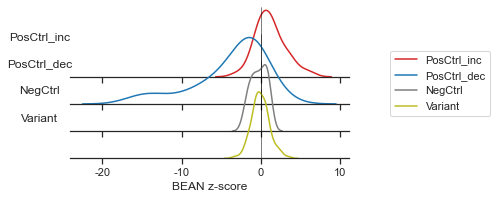

In [26]:
plt.style.use('jr')
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})
fig, ax = plt.subplots(4, 1, figsize=(5,4), sharex=True)

for i, g in enumerate(['PosCtrl_inc', 'PosCtrl_dec', 'NegCtrl', 'Variant']):
    sns.kdeplot(scores_tbl.loc[scores_tbl.target_group2 == g], x = "mu_z_adj", hue='target_group2', palette=target_group2_pal, ax = ax[i], label = g)
    ax[i].axvline(0, c = 'black', linewidth=0.5)
    ax[i].get_legend().remove()
    ax[i].set_ylabel(g, rotation=0, labelpad=30, )
    ax[i].spines[['right', 'top', 'left']].set_visible(False)
    ax[i].set_box_aspect(0.25)
ax[0].set_xticks([-20, -10, 0, 10])
fig.legend(bbox_to_anchor=(1, 0.5), loc="center left")
ax[-1].set_xlabel("BEAN z-score")
plt.setp(ax, yticks=[])
fig.subplots_adjust(hspace=-0.8)
fig.savefig("control_distributions_Ridge.pdf", bbox_inches="tight")

In [27]:
scores_tbl

,Unnamed: 0,target,target_variant,target_group,target_group2,edit_rate_mean,edit_rate_std,mu,mu_sd,mu_z,...,sd_scaled,novl_scaled,mu_adj,mu_sd_adj,mu_z_adj,novl_adj,CI[0.025,0.975],gene_dbSNP,Notes
0,74,LDLR_SD_12,LDLR,PosCtrl,PosCtrl_dec,0.605040,0.145153,-1.519292,0.094432,-16.088717,...,1.007934,0.929258,-1.529812,0.094767,-16.142845,0.929543,-1.715552,-1.344071,NaN,NaN
1,65,LDLR_SA_4,LDLR,PosCtrl,PosCtrl_dec,0.503645,0.118360,-1.343790,0.090258,-14.888320,...,1.003721,0.915109,-1.352886,0.090578,-14.936104,0.915447,-1.530416,-1.175356,NaN,NaN
2,71,LDLR_SD_9,LDLR,PosCtrl,PosCtrl_dec,0.631704,0.168399,-1.317933,0.094030,-14.016108,...,1.007225,0.909289,-1.326819,0.094364,-14.060723,0.909649,-1.511768,-1.141870,NaN,NaN
3,69,LDLR_SA_8,LDLR,PosCtrl,PosCtrl_dec,0.677679,0.095749,-1.110089,0.082550,-13.447397,...,1.002792,0.898877,-1.117289,0.082843,-13.486762,0.899276,-1.279659,-0.954919,NaN,NaN
4,75,LDLR_SD_13,LDLR,PosCtrl,PosCtrl_dec,0.398683,0.055129,-1.035116,0.089634,-11.548209,...,1.009398,0.883445,-1.041707,0.089952,-11.580656,0.883901,-1.218010,-0.865404,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,226,rs1250259_Maj_ABE_59,rs1250259,Variant,Variant,0.441253,0.182309,0.275793,0.075235,3.665773,...,1.010400,0.845365,0.279838,0.075501,3.706396,0.845962,0.131858,0.427818,NaN,NaN
691,109,MYLIP_SD_87,MYLIP,PosCtrl,PosCtrl_inc,0.784883,0.102735,0.635449,0.152330,4.171545,...,1.007695,0.758228,0.642413,0.152870,4.202351,0.759117,0.342794,0.942033,NaN,NaN
692,107,MYLIP_SA_85,MYLIP,PosCtrl,PosCtrl_inc,0.650502,0.122910,0.604131,0.143098,4.221806,...,1.003828,0.766419,0.610840,0.143605,4.253603,0.767282,0.329379,0.892302,NaN,NaN
693,98,LSS_SD_22,LSS,PosCtrl,PosCtrl_inc,0.717706,0.042190,0.684116,0.126882,5.391740,...,1.008243,0.797472,0.691474,0.127332,5.430470,0.798232,0.441908,0.941041,NaN,NaN


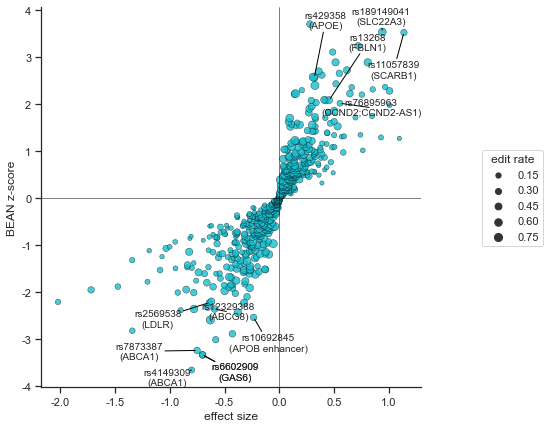

In [28]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
pdf= scores_tbl.loc[scores_tbl.target_group2 == "Variant"]
sns.scatterplot(pdf, x = 'mu_adj', y= pdf.mu_z_adj, alpha=0.8, size='edit_rate_mean', color = pal[-1], edgecolor='black')
ax.set_xlabel("effect size")
ax.set_ylabel("BEAN z-score")
texts = [ax.text(df['mu_adj'], df.mu_z_adj, f"{df['target_variant']}\n({df['gene_dbSNP']})") for i, df in scores_tbl.loc[~scores_tbl.gene_dbSNP.isnull()].iterrows()]
ax.axvline(0, color='black', linewidth=0.5)
ax.axhline(0, color='black', linewidth=0.5)
ax.set_aspect(1/ax.get_data_ratio(), 'box')
ax.get_legend().remove()
fig.legend(bbox_to_anchor=(1, 0.5), loc='center left', title='edit rate')
ax.spines[['right', 'top']].set_visible(False)
adjust_text(texts, x=pdf.mu_adj, y=pdf.mu_z_adj, arrowprops=dict(arrowstyle='-', color='black'), ax = ax, force_text=(0.2, 0.5), force_static=(0.1, 0.1), min_arrow_len = 0)
#fig.savefig("variant_scores.pdf", bbox_inches='tight')

In [29]:
scores_tbl.to_csv("LDLvar_hits.csv")

In [30]:
hits

,Unnamed: 0,target,target_variant,target_group,target_group2,edit_rate_mean,edit_rate_std,mu,mu_sd,mu_z,...,mu_sd_scaled,mu_z_scaled,sd_scaled,novl_scaled,mu_adj,mu_sd_adj,mu_z_adj,novl_adj,CI[0.025,0.975]
74,74,LDLR_SD_12,LDLR,PosCtrl,PosCtrl_dec,0.605040,0.145153,-1.519292,0.094432,-16.088717,...,0.095198,-16.069727,1.007934,0.929258,-1.529812,0.094767,-16.142845,0.929543,-1.715552,-1.344071
65,65,LDLR_SA_4,LDLR,PosCtrl,PosCtrl_dec,0.503645,0.118360,-1.343790,0.090258,-14.888320,...,0.090990,-14.868451,1.003721,0.915109,-1.352886,0.090578,-14.936104,0.915447,-1.530416,-1.175356
71,71,LDLR_SD_9,LDLR,PosCtrl,PosCtrl_dec,0.631704,0.168399,-1.317933,0.094030,-14.016108,...,0.094793,-13.997035,1.007225,0.909289,-1.326819,0.094364,-14.060723,0.909649,-1.511768,-1.141870
69,69,LDLR_SA_8,LDLR,PosCtrl,PosCtrl_dec,0.677679,0.095749,-1.110089,0.082550,-13.447397,...,0.083220,-13.425674,1.002792,0.898877,-1.117289,0.082843,-13.486762,0.899276,-1.279659,-0.954919
75,75,LDLR_SD_13,LDLR,PosCtrl,PosCtrl_dec,0.398683,0.055129,-1.035116,0.089634,-11.548209,...,0.090362,-11.528202,1.009398,0.883445,-1.041707,0.089952,-11.580656,0.883901,-1.218010,-0.865404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,226,rs1250259_Maj_ABE_59,rs1250259,Variant,Variant,0.441253,0.182309,0.275793,0.075235,3.665773,...,0.075845,3.689608,1.010400,0.845365,0.279838,0.075501,3.706396,0.845962,0.131858,0.427818
109,109,MYLIP_SD_87,MYLIP,PosCtrl,PosCtrl_inc,0.784883,0.102735,0.635449,0.152330,4.171545,...,0.153566,4.183316,1.007695,0.758228,0.642413,0.152870,4.202351,0.759117,0.342794,0.942033
107,107,MYLIP_SA_85,MYLIP,PosCtrl,PosCtrl_inc,0.650502,0.122910,0.604131,0.143098,4.221806,...,0.144259,4.234337,1.003828,0.766419,0.610840,0.143605,4.253603,0.767282,0.329379,0.892302
98,98,LSS_SD_22,LSS,PosCtrl,PosCtrl_inc,0.717706,0.042190,0.684116,0.126882,5.391740,...,0.127912,5.405873,1.008243,0.797472,0.691474,0.127332,5.430470,0.798232,0.441908,0.941041


In [31]:
pdf

,Unnamed: 0,target,target_variant,target_group,target_group2,edit_rate_mean,edit_rate_std,mu,mu_sd,mu_z,...,sd_scaled,novl_scaled,mu_adj,mu_sd_adj,mu_z_adj,novl_adj,CI[0.025,0.975],gene_dbSNP,Notes
16,340,rs4149309_Maj_ABE_206,rs4149309,Variant,Variant,0.314741,0.106554,-0.796598,0.218171,-3.651252,...,1.009775,0.707008,-0.801254,0.218945,-3.659608,0.708043,-1.230379,-0.372129,ABCA1,"low accessibility region in ABCA1 intron, 130 ..."
20,389,rs6602909_Maj_ABE_260,rs6602909,Variant,Variant,0.427919,0.246049,-0.696837,0.209183,-3.331240,...,1.002386,0.698550,-0.700684,0.209925,-3.337786,0.699616,-1.112129,-0.289239,GAS6,Associated with CHD (10.4103/1008-682X.172825)
21,389,rs6602909_Maj_ABE_260,rs6602909,Variant,Variant,0.427919,0.246049,-0.696837,0.209183,-3.331240,...,1.002386,0.698550,-0.700684,0.209925,-3.337786,0.699616,-1.112129,-0.289239,GAS6,Associated with CHD (10.4103/1008-682X.172825)
22,418,rs7873387_Maj_ABE_314,rs7873387,Variant,Variant,0.415699,0.172650,-0.746367,0.230645,-3.235993,...,1.013483,0.684245,-0.750615,0.231464,-3.242907,0.685347,-1.204275,-0.296955,ABCA1,Cholesterol transport
24,162,rs360801_Maj_ABE_184,rs360801,Variant,Variant,0.390423,0.144377,-0.577792,0.192033,-3.008815,...,1.005747,0.699906,-0.580672,0.192714,-3.013124,0.700975,-0.958385,-0.202959,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,627,rs74612335_Maj_ABE_293,rs74612335,Variant,Variant,0.373259,0.198848,0.482209,0.156320,3.084762,...,1.011844,0.734678,0.487930,0.156874,3.110322,0.735646,0.180462,0.795398,NaN,NaN
684,210,rs869412_Maj_ABE_331,rs869412,Variant,Variant,0.465226,0.156521,0.713186,0.221573,3.218735,...,1.003999,0.688394,0.720781,0.222359,3.241511,0.689486,0.284964,1.156597,NaN,NaN
687,476,rs11057839_Min_ABE_366,rs11057839,Variant,Variant,0.370369,0.122376,1.127267,0.321586,3.505342,...,1.007241,0.696961,1.138222,0.322726,3.526893,0.697971,0.505689,1.770754,SCARB1,Cholesterol transport
688,678,rs189149041_Maj_ABE_119,rs189149041,Variant,Variant,0.688327,0.179505,0.931870,0.265094,3.515249,...,1.010688,0.691530,0.941239,0.266034,3.538038,0.692589,0.419822,1.462656,SLC22A3,Cation transporter known to be associated with...


In [32]:
pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<ipython-input-33-33c3a387c6f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf["sig"] = pdf.target.isin(hits.target.tolist())
WARNING @ Thu, 17 Aug 2023 18:31:19:
	 findfont: Font family ['sans-serif'] not found. Falling back to Helvetica. 

WARNING @ Thu, 17 Aug 2023 18:31:19:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 17 Aug 2023 18:31:19:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 17 Aug 2023 18:31:19:
	 findfont: Generic family 'sans-serif' not found bec

WARNING @ Thu, 17 Aug 2023 18:31:19:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 17 Aug 2023 18:31:19:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 17 Aug 2023 18:31:19:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 17 Aug 2023 18:31:19:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif 

WARNING @ Thu, 17 Aug 2023 18:31:19:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Libera

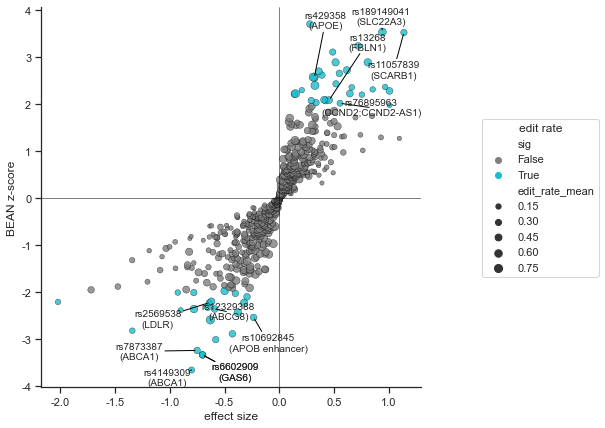

In [33]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
pdf= scores_tbl.loc[scores_tbl.target_group2 == "Variant"]
pdf["sig"] = pdf.target.isin(hits.target.tolist())
sns.scatterplot(pdf, x = 'mu_adj', y= pdf.mu_z_adj, alpha=0.8, size='edit_rate_mean', edgecolor='black', hue="sig", palette={True:pal[-1], False:pal[-3]})
ax.set_xlabel("effect size")
ax.set_ylabel("BEAN z-score")
texts = [ax.text(df['mu_adj'], df.mu_z_adj, f"{df['target_variant']}\n({df['gene_dbSNP']})") for i, df in scores_tbl.loc[~scores_tbl.gene_dbSNP.isnull()].iterrows()]
ax.axvline(0, color='black', linewidth=0.5)
ax.axhline(0, color='black', linewidth=0.5)
ax.set_aspect(1/ax.get_data_ratio(), 'box')
ax.get_legend().remove()
fig.legend(bbox_to_anchor=(1, 0.5), loc='center left', title='edit rate')
ax.spines[['right', 'top']].set_visible(False)
adjust_text(texts, x=pdf.mu_adj, y=pdf.mu_z_adj, arrowprops=dict(arrowstyle='-', color='black'), ax = ax, force_text=(0.2, 0.5), force_static=(0.1, 0.1), min_arrow_len = 0)
fig.savefig("variant_scores.pdf", bbox_inches='tight')